## Algoritmo para predecir el LTV a 24 meses

### Preparación de los datos

1. **Colección y limpieza de datos:**
    - Asegurarse de que los datos incluyan información relevante como demografía del cliente, historial de compras y métricas de interacción.
    - Limpiar los datos para manejar valores faltantes, outliers y consistencia de formatos.
    - Define y calcula la variable objetivo.

### Ingeniería de características

2. **Creación de características:**
    - Crear características que reflejen el comportamiento del cliente, tales como el gasto total, la cantidad promedio de transacciones, la frecuencia de compra, y el tiempo desde la última compra.
    - Considerar la creación de características en ventanas de tiempo como el gasto total en los últimos 6 o 12 meses.

### Análisis exploratorio de datos (EDA)

3. **Análisis exploratorio:**
    - Analizar los datos para entender patrones y relaciones.
    - Visualizar las distribuciones del gasto y otras métricas relevantes a través de diferentes segmentos de clientes.
    - Agrupar clientes basándose en la fecha de su primera compra y seguir su comportamiento a lo largo del tiempo.


### Modelado predictivo

4. **Modelado predictivo:**
    - Dividir los datos en conjuntos de entrenamiento y prueba.
    - Elegir un modelo de regresión adecuado para predecir un resultado continuo como el LTV.
    - Entrenar el modelo en los datos de entrenamiento utilizando las características desarrolladas.

### Evaluación del modelo

5. **Evaluación del modelo:**
    - Evaluar el modelo en el conjunto de prueba usando métricas adecuadas, como el error cuadrático medio (RMSE) o el error absoluto medio (MAE).
    - Analizar los residuales para asegurar que el modelo funciona bien en todos los segmentos de clientes.

### Interpretación del modelo y aplicación de insights

6. **Interpretación y acción:**
    - Interpretar el modelo para entender qué características son más predictivas del LTV.
    - Usar la salida del modelo para segmentar clientes basándose en su LTV predicho y dirigirles estrategias de marketing específicas.

### Despliegue y monitoreo

7. **Despliegue y monitoreo:**
    - Implementar el modelo en un entorno de producción donde pueda predecir el LTV de nuevos clientes.
    - Monitorear regularmente el desempeño del modelo y actualizarlo según sea necesario para manejar cambios en el comportamiento del cliente o en las condiciones del mercado.

In [12]:
import pandas as pd
import numpy as np
import datetime

In [13]:
df_data = pd.read_csv('tlacuachitos_vip_customers_data.csv')
df_data.head()

,CustomerID,Age,Income,Tenure,Education,Industry,Geographic Location,Churn_Risk,Cohort
0,1,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31
1,2,69,55297.364348,6,Bachelor,Technology,South America,0,2021-08-31
2,3,46,57978.753383,3,Bachelor,Finance,Europe,1,2019-05-31
3,4,32,60445.266900,3,High School,Education,South America,1,2021-02-28
4,5,60,57741.870929,5,Bachelor,Entertainment,Asia,0,2018-10-31


In [17]:
df_transactions = pd.read_csv('transactions.csv')
df_transactions.head()

,CustomerID,TransactionDate,TransactionAmount
0,1,2023-10-31,518.444092
1,1,2024-07-31,353.796197
2,1,2024-01-31,38.206591
3,1,2024-06-30,724.929423
4,2,2022-02-28,145.616000


In [18]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           1143 non-null   int64  
 1   Age                  1143 non-null   int64  
 2   Income               1143 non-null   float64
 3   Tenure               1143 non-null   int64  
 4   Education            1143 non-null   object 
 5   Industry             1143 non-null   object 
 6   Geographic Location  1143 non-null   object 
 7   Churn_Risk           1143 non-null   int64  
 8   Cohort               1143 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 80.5+ KB


In [19]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         4346 non-null   int64  
 1   TransactionDate    4346 non-null   object 
 2   TransactionAmount  4346 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 102.0+ KB


In [20]:
df_transactions['TransactionDate'] = pd.to_datetime(df_transactions['TransactionDate'])
df_data['Cohort'] = pd.to_datetime(df_data['Cohort'])

In [21]:
snapshot_date = df_transactions['TransactionDate'].max()
snapshot_date

Timestamp('2024-08-31 00:00:00')

In [22]:
df_transactions['TransactionDate'].min()

Timestamp('2018-01-31 00:00:00')

In [23]:
df_data['customer_tenure'] = (snapshot_date.year - df_data['Cohort'].dt.year)*12 + (
    snapshot_date.month - df_data['Cohort'].dt.month)

df_data.head()

,CustomerID,Age,Income,Tenure,Education,Industry,Geographic Location,Churn_Risk,Cohort,customer_tenure
0,1,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,12
1,2,69,55297.364348,6,Bachelor,Technology,South America,0,2021-08-31,36
2,3,46,57978.753383,3,Bachelor,Finance,Europe,1,2019-05-31,63
3,4,32,60445.266900,3,High School,Education,South America,1,2021-02-28,42
4,5,60,57741.870929,5,Bachelor,Entertainment,Asia,0,2018-10-31,70


In [24]:
df_master = df_transactions.merge(df_data, on='CustomerID')
df_master.head()

,CustomerID,TransactionDate,TransactionAmount,Age,Income,Tenure,Education,Industry,Geographic Location,Churn_Risk,Cohort,customer_tenure
0,1,2023-10-31,518.444092,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,12
1,1,2024-07-31,353.796197,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,12
2,1,2024-01-31,38.206591,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,12
3,1,2024-06-30,724.929423,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,12
4,2,2022-02-28,145.616000,69,55297.364348,6,Bachelor,Technology,South America,0,2021-08-31,36


In [25]:
df_master['customer_tenure_on_transaction'] = (
    df_master['TransactionDate'].dt.year - df_master['Cohort'].dt.year)*12 + (
    df_master['TransactionDate'].dt.month - df_master['Cohort'].dt.month
)
df_master['customer_tenure_on_transaction']

0        2
1       11
2        5
3       10
4        6
        ..
4341     7
4342     2
4343     7
4344    10
4345    17
Name: customer_tenure_on_transaction, Length: 4346, dtype: int32

In [26]:
cltv_24_months = df_master[
    (df_master['customer_tenure'] > 24) &
    (df_master['customer_tenure_on_transaction'] <= 24)
].groupby('CustomerID')['TransactionAmount'].sum().reset_index()

cltv_24_months

,CustomerID,TransactionAmount
0,2,145.616000
1,3,487.285458
2,4,1095.025887
3,5,1685.260152
4,6,728.364381
...,...,...
857,1136,189.961932
858,1138,2375.255820
859,1139,1327.509070
860,1141,718.548745


In [32]:
categorical_features = ['Education', 'Industry', 'Geographic Location']
numerical_features = ['Age', 'Income', 'Tenure']

data_encoded = pd.get_dummies(df_data[['CustomerID']+categorical_features],  n n
                              columns=categorical_features, 
                              drop_first=False)



df_data_with_encoded = df_data[['CustomerID']+numerical_features].merge(
    data_encoded, on='CustomerID')

df_to_model = cltv_24_months.merge(df_data_with_encoded, on='CustomerID')
df_to_model.rename(columns={'TransactionAmount': 'CLTV'}, inplace=True)

df_to_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CustomerID                         862 non-null    int64  
 1   CLTV                               862 non-null    float64
 2   Age                                862 non-null    int64  
 3   Income                             862 non-null    float64
 4   Tenure                             862 non-null    int64  
 5   Education_Bachelor                 862 non-null    bool   
 6   Education_High School              862 non-null    bool   
 7   Education_Master                   862 non-null    bool   
 8   Education_PhD                      862 non-null    bool   
 9   Industry_Education                 862 non-null    bool   
 10  Industry_Entertainment             862 non-null    bool   
 11  Industry_Finance                   862 non-null    bool   

In [35]:
from sklearn.preprocessing import StandardScaler

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.preprocessing import PolynomialFeatures

# Crear características polinómicas
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

from sklearn.linear_model import Ridge

# Usar Ridge para regularización L2
model = Ridge(alpha=1.0)  # Ajusta el valor de alpha según sea necesario
model.fit(X_poly, y)

# Recuperar los coeficientes
coefficients = pd.DataFrame({
    'Variable': poly.get_feature_names_out(X.columns),
    'Coefficient': model.coef_
})

# Assuming df_to_model is your DataFrame
# Prepare the data
X = df_to_model.drop(['CustomerID', 'CLTV'], axis=1)
y = df_to_model['CLTV']

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

# Retrieve the coefficients
coefficients = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': model.coef_
})

# Display the coefficients
coefficients


,Variable,Coefficient
0,Age,2.502638
1,Income,0.002348
2,Tenure,51.836504
3,Education_Bachelor,-46.490364
4,Education_High School,-160.511753
5,Education_Master,98.663128
6,Education_PhD,108.338989
7,Industry_Education,-258.197809
8,Industry_Entertainment,205.516485
9,Industry_Finance,-27.829737


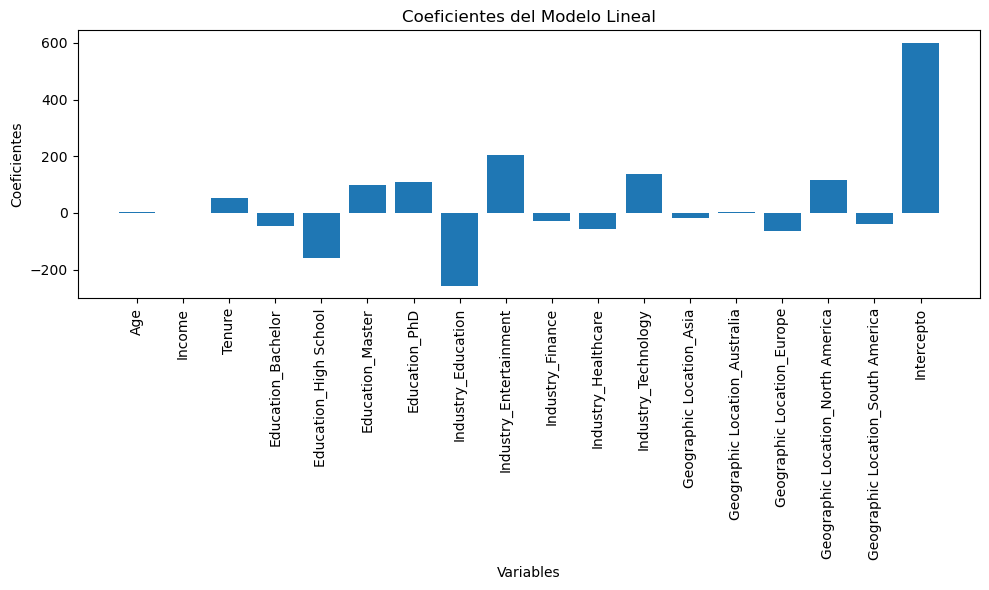

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Preparar los datos
X = df_to_model.drop(['CustomerID', 'CLTV'], axis=1)
y = df_to_model['CLTV']

# Inicializar y ajustar el modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Obtener los coeficientes y el intercepto
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo.coef_
})

intercepto = modelo.intercept_

# Agregar el intercepto al DataFrame de coeficientes
# Opción 1: Usando pd.concat()
intercepto_df = pd.DataFrame({'Variable': ['Intercepto'], 'Coeficiente': [intercepto]})
coeficientes = pd.concat([coeficientes, intercepto_df], ignore_index=True)

# Opción 2: Asignando directamente al DataFrame
# coeficientes.loc[len(coeficientes)] = ['Intercepto', intercepto]

# Visualizar los coeficientes
plt.figure(figsize=(10, 6))
plt.bar(coeficientes['Variable'], coeficientes['Coeficiente'])
plt.xlabel('Variables')
plt.ylabel('Coeficientes')
plt.title('Coeficientes del Modelo Lineal')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [52]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import statsmodels.api as sm

# Asumir que df_to_model es tu DataFrame y contiene las columnas necesarias
# Preparar los datos
X = df_to_model.drop(['CustomerID', 'CLTV'], axis=1)
y = df_to_model['CLTV']

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear características polinómicas
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Añadir una columna de constantes (intercepto) para la regresión en statsmodels
X_poly = sm.add_constant(X_poly)

# Ajustar el modelo de regresión usando statsmodels
model = sm.OLS(y, X_poly).fit()

# Recuperar los resultados de la prueba de hipótesis
summary = model.summary()

# Mostrar el resumen de la regresión, que incluye los coeficientes y las pruebas de hipótesis (p-valores)
print(summary)


                            OLS Regression Results                            
Dep. Variable:                   CLTV   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     2.361
Date:                Fri, 27 Sep 2024   Prob (F-statistic):           2.58e-10
Time:                        16:38:42   Log-Likelihood:                -6718.6
No. Observations:                 862   AIC:                         1.363e+04
Df Residuals:                     768   BIC:                         1.407e+04
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.474e+13   4.29e+13      1.741      0.0

                            OLS Regression Results                            
Dep. Variable:                   CLTV   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     7.039
Date:                Fri, 27 Sep 2024   Prob (F-statistic):           1.13e-13
Time:                        16:44:14   Log-Likelihood:                -5388.9
No. Observations:                 689   AIC:                         1.081e+04
Df Residuals:                     674   BIC:                         1.088e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1034.5318     23.238     44.519      0.0

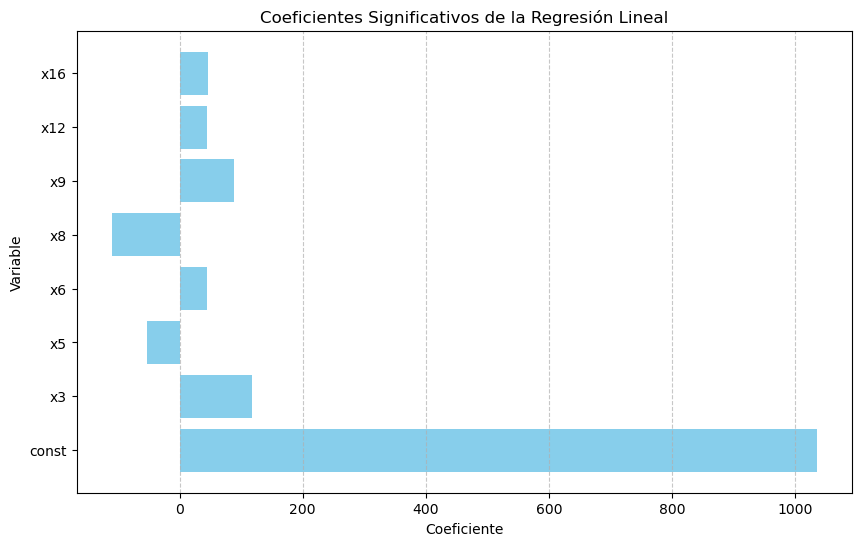

In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Asumir que df_to_model es tu DataFrame y contiene las columnas necesarias
# Preparar los datos
X = df_to_model.drop(['CustomerID', 'CLTV'], axis=1)
y = df_to_model['CLTV']

# Separar en conjunto de entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Agregar un intercepto para la regresión (solo para statsmodels)
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

# Ajustar el modelo de regresión con statsmodels solo en el conjunto de entrenamiento
model = sm.OLS(y_train, X_train_scaled)
results = model.fit()

# Mostrar el resumen de las pruebas de hipótesis
print(results.summary())

# Predecir los valores en el conjunto de prueba
y_pred = results.predict(X_test_scaled)

# Evaluar el desempeño del modelo con métricas como R²
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R² en el conjunto de prueba: {r2:.4f}')
print(f'Error cuadrático medio (MSE) en el conjunto de prueba: {mse:.4f}')

# Extraer los coeficientes significativos con p-valor < 0.05 del conjunto de entrenamiento
significant_coefficients = results.params[results.pvalues < 0.05]
significant_variables = significant_coefficients.index

# Mostrar las variables significativas y sus coeficientes
significant_df = pd.DataFrame({
    'Variable': significant_variables,
    'Coefficient': significant_coefficients
})

# Graficar los coeficientes significativos
plt.figure(figsize=(10, 6))
plt.barh(significant_df['Variable'], significant_df['Coefficient'], color='skyblue')
plt.xlabel('Coeficiente')
plt.ylabel('Variable')
plt.title('Coeficientes Significativos de la Regresión Lineal')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


225